In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from statsmodels.graphics.mosaicplot import mosaic

In [38]:
df = pd.read_csv('./dataset/adult.data.txt', sep=", ", header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", \
              "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary-range"]
below_50K = df[df["salary-range"] == "<=50K"].sample(n=7841)
above_50K = df[df["salary-range"] == ">50K"]

df = pd.concat([above_50K, below_50K])
df['class'] = (df["salary-range"] == ">50K")*1
#print(df['class'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [43]:
def plot_scatter_plot(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10,10))
    fig.subplots_adjust(hspace=.5)
    
    x = below_50K[column1]
    y = below_50K[column2]
    axes[0, 0].scatter(x,y)
    axes[0, 0].set_title("<=50K")
    axes[0, 0].set_xlabel(column1)
    axes[0, 0].set_ylabel(column2)
    
    x = above_50K[column1]
    y = above_50K[column2]
    axes[0, 1].scatter(x,y)
    axes[0, 1].set_title(">50K")
    axes[0, 1].set_xlabel(column1)
    axes[0, 1].set_ylabel(column2)
    
    x = below_50K[column2]
    y = below_50K[column3]
    axes[1, 0].scatter(x,y)
    axes[1, 0].set_title("<=50K")
    axes[1, 0].set_xlabel(column2)
    axes[1, 0].set_ylabel(column3)
    
    x = above_50K[column2]
    y = above_50K[column3]
    axes[1, 1].scatter(x,y)
    axes[1, 1].set_title(">50K")
    axes[1, 1].set_xlabel(column2)
    axes[1, 1].set_ylabel(column3)
    
    x = below_50K[column3]
    y = below_50K[column1]
    axes[2, 0].scatter(x,y)
    axes[2, 0].set_title("<=50K")
    axes[2, 0].set_xlabel(column3)
    axes[2, 0].set_ylabel(column1)
    
    x = above_50K[column3]
    y = above_50K[column1]
    axes[2, 1].scatter(x,y)
    axes[2, 1].set_title(">50K")
    axes[2, 1].set_xlabel(column3)
    axes[2, 1].set_ylabel(column1)
    
    plt.show()

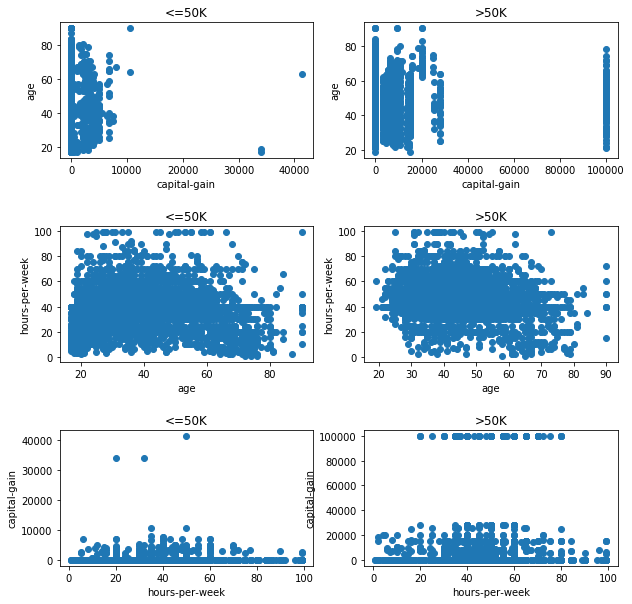

In [44]:
plot_scatter_plot('capital-gain', 'age', 'hours-per-week')

In [45]:
def plot_scatter_plot_diff(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(10,30))
    fig.subplots_adjust(hspace=.5)
    
    colors = df['class']
    x = df[column1]
    y = df[column2]
    axes[0].scatter(x,y,c=colors)
    axes[0].set_title("purple <=50K, yellow >50K")
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel(column2)
    
    x = df[column2]
    y = df[column3]
    axes[1].scatter(x,y,c=colors)
    axes[1].set_title("purple <=50K, yellow >50K")
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel(column3)
    
    x = df[column3]
    y = df[column1]
    axes[2].scatter(x,y,c=colors)
    axes[2].set_title("purple <=50K, yellow >50K")
    axes[2].set_xlabel(column3)
    axes[2].set_ylabel(column1)
    
    plt.show()

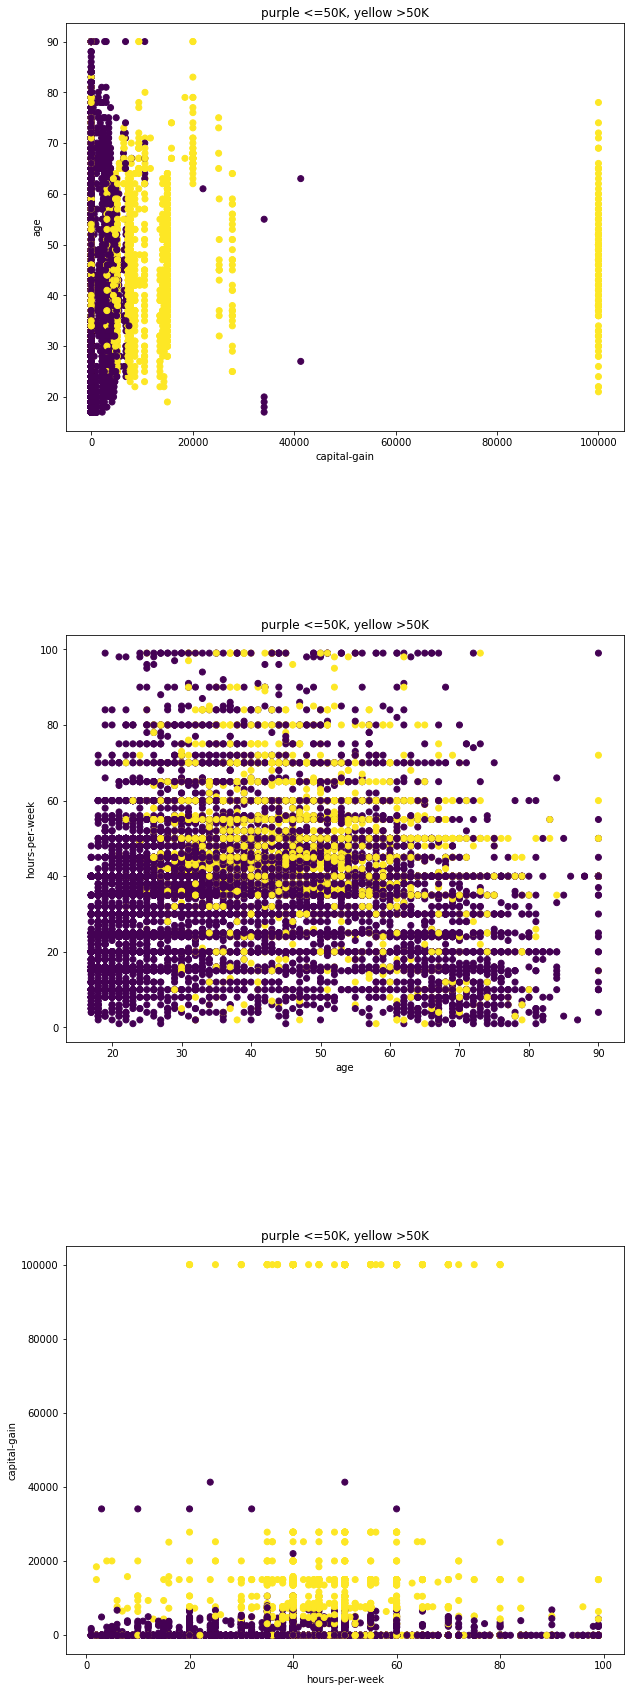

In [46]:
plot_scatter_plot_diff('capital-gain', 'age', 'hours-per-week')

In [19]:
def plot_scatter_plot_diff_single(column1, column2, column3):
    plt.close()
#     fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(10,30))
#     fig.subplots_adjust(hspace=.5)
    
    colors = df['class']
    x = df[column1]
    y = df[column2]
    plt.scatter(x,y,c=colors)
    #plt.set_title("purple <=50K, yellow >50K")
    #plt.set_xlabel(column1)
    #plt.set_ylabel(column2)
    plt.show()
    
    x = df[column2]
    y = df[column3]
    plt.scatter(x,y,c=colors)
    #plt.set_title("purple <=50K, yellow >50K")
    #plt.set_xlabel(column2)
    #plt.set_ylabel(column3)
    plt.show()
    
    x = df[column3]
    y = df[column1]
    plt.scatter(x,y,c=colors)
    #plt.set_title("purple <=50K, yellow >50K")
    #plt.set_xlabel(column3)
    #plt.set_ylabel(column1)
    plt.show()

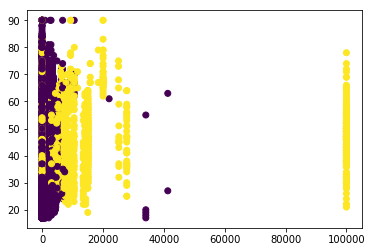

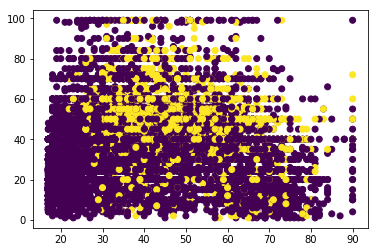

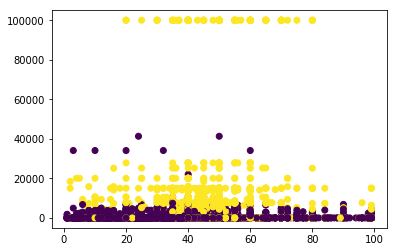

In [20]:
plot_scatter_plot_diff_single('capital-gain', 'age', 'hours-per-week')

In [47]:
def plot_scatter_matrix(column1, column2, column3):
    df_below_sm = below_50K[[column1, column2, column3]]
    print("Salary <=50K")
    pd.plotting.scatter_matrix(df_below_sm)
    plt.show()
    df_above_sm = above_50K[[column1, column2, column3]]
    print("Salary >50K")
    pd.plotting.scatter_matrix(df_above_sm)
    plt.show()

In [77]:
def plot_scatter_matrix_big(column1, column2, column3):
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15,11))
    fig.subplots_adjust(hspace=.5)
    df_below_sm = below_50K[[column1, column2, column3]]
    print("Salary <=50K")
    pd.plotting.scatter_matrix(df_below_sm, ax=axes[0])
#     plt.show()
#     df_above_sm = above_50K[[column1, column2, column3]]
#     print("Salary >50K")
#     pd.plotting.scatter_matrix(df_above_sm, ax=axes[1])
    plt.show()

Salary <=50K


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """Entry point for launching an IPython kernel.


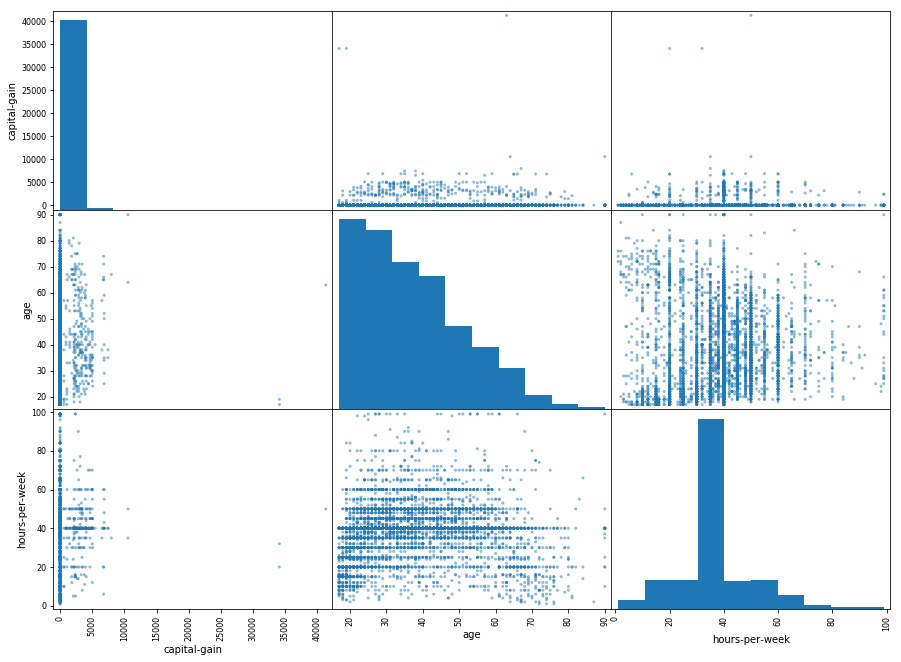

In [78]:
plot_scatter_matrix_big('capital-gain', 'age', 'hours-per-week')

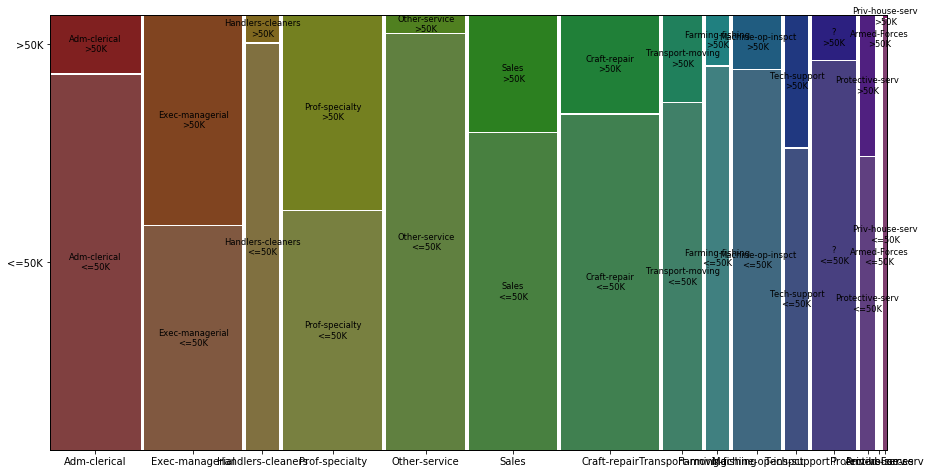

In [49]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,8))
fig.subplots_adjust(hspace=.5)
mosaic(df, ['occupation', 'salary-range'], ax=axes)
plt.show()

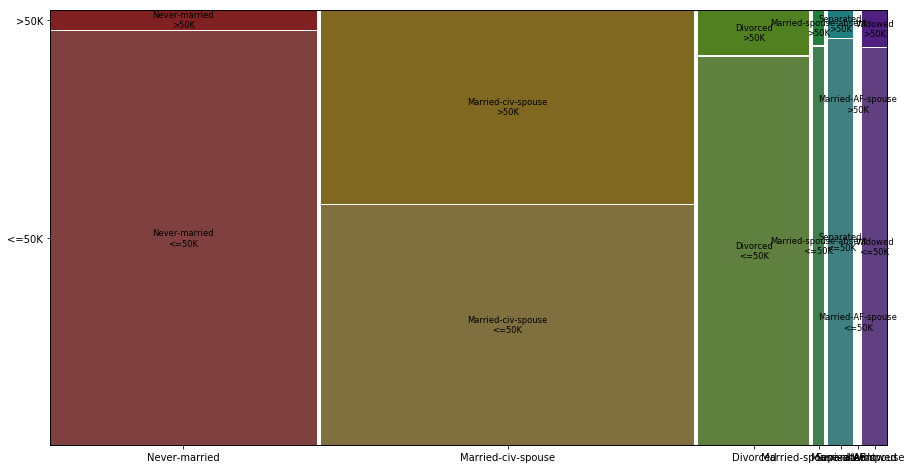

In [56]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,8))
fig.subplots_adjust(hspace=.5)
mosaic(df, ['marital-status', 'salary-range'], ax=axes)
plt.show()

In [50]:
def plot_mosaic_class(column1, column2, column3):
    plt.close()
    cols = [column1, column2, column3]
    for i in range(3):
        for j in range(i+1, 3):
            print("Salary <=50K")
            mosaic(below_50K, [cols[i], cols[j]])
            plt.show()
            print("Salary >50K")
            mosaic(above_50K, [cols[i], cols[j]])
            plt.show()
    for i in range(3):
        print("Salary <=50K")
        mosaic(below_50K, [cols[i]])
        plt.show()
        print("Salary >50K")
        mosaic(above_50K, [cols[i]])
        plt.show()
#     for i in range(3):
#         for j in range(i+1, 3):
#             mosaic(df, [cols[i], cols[j], 'salary-range'])
#             plt.show()
    for i in range(3):
        mosaic(df, [cols[i], 'salary-range'])
        plt.show()

Salary <=50K


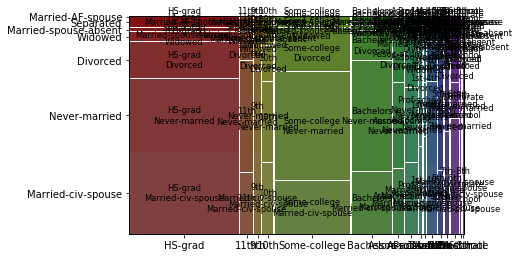

Salary >50K


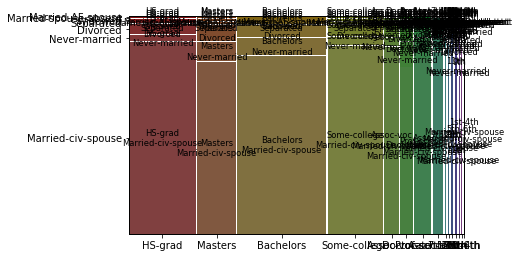

Salary <=50K


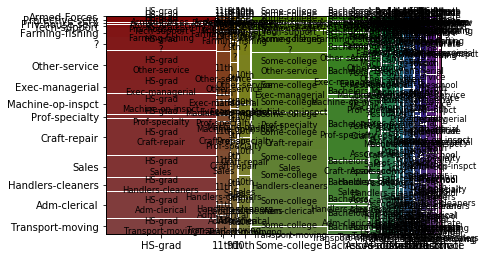

Salary >50K


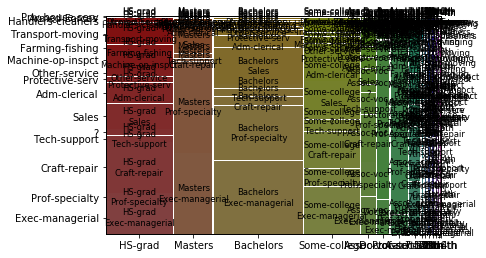

Salary <=50K


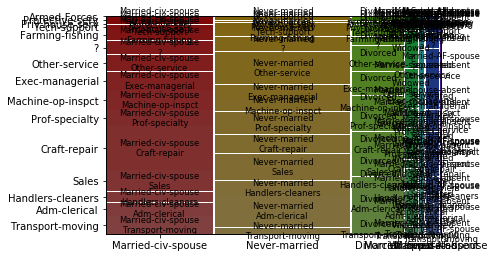

Salary >50K


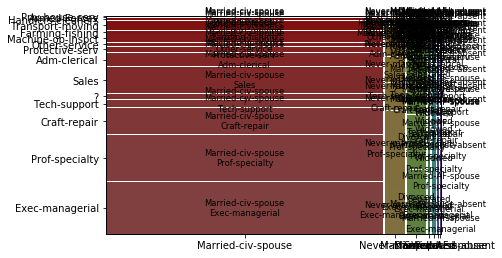

Salary <=50K


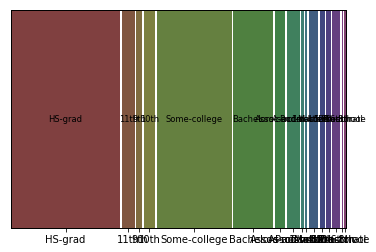

Salary >50K


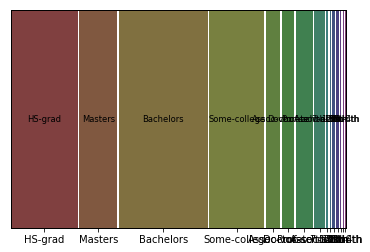

Salary <=50K


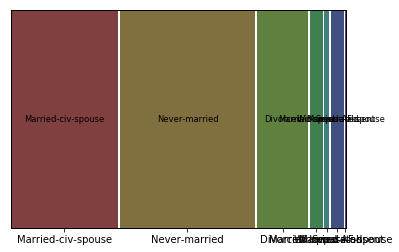

Salary >50K


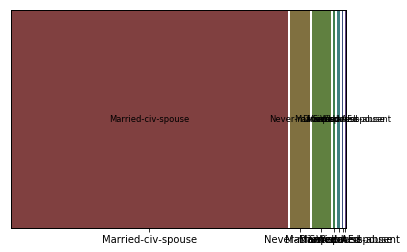

Salary <=50K


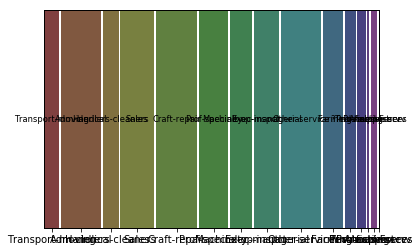

Salary >50K


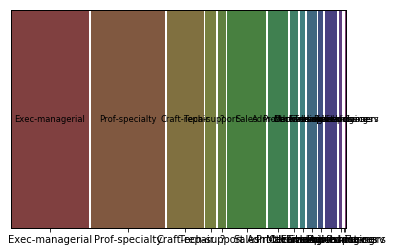

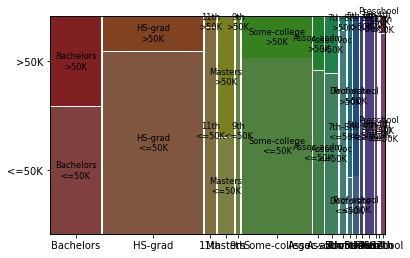

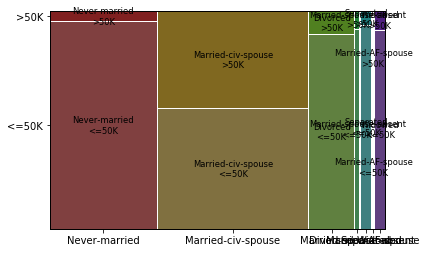

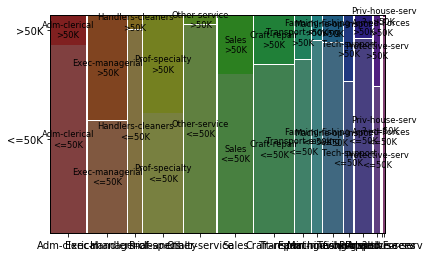

In [51]:
plot_mosaic_class('education', 'marital-status', 'occupation')

  salary-range      sex  count
0        <=50K   Female   9592
1        <=50K     Male  15128
2         >50K   Female   1179
3         >50K     Male   6662


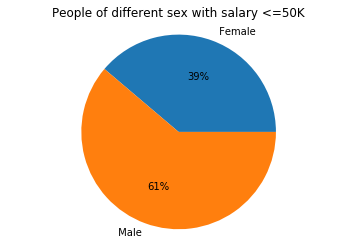

In [3]:
groupedDf = pd.DataFrame({'count' : df.groupby(['salary-range', 'sex']).size()}).reset_index()
print(groupedDf)
plt.pie([groupedDf['count'][i] for i in range(2)], labels=[groupedDf['sex'][i] for i in range(2)], autopct='%0.0f%%', shadow=False)
plt.axis('equal')
plt.title('People of different sex with salary <=50K')
plt.show()

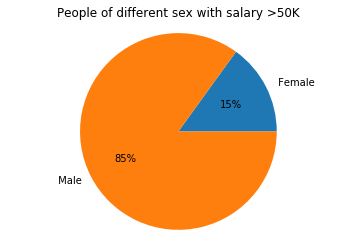

In [4]:
plt.pie([groupedDf['count'][i] for i in range(2,4)], labels=[groupedDf['sex'][i] for i in range(2,4)], autopct='%0.0f%%', shadow=False)
plt.axis('equal')
plt.title('People of different sex with salary >50K')
plt.show()

  salary-range                 race  count
0        <=50K   Amer-Indian-Eskimo    275
1        <=50K   Asian-Pac-Islander    763
2        <=50K                Black   2737
3        <=50K                Other    246
4        <=50K                White  20699
5         >50K   Amer-Indian-Eskimo     36
6         >50K   Asian-Pac-Islander    276
7         >50K                Black    387
8         >50K                Other     25
9         >50K                White   7117


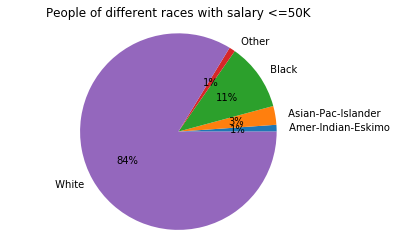

In [5]:
groupedDf = pd.DataFrame({'count' : df.groupby(['salary-range', 'race']).size()}).reset_index()
print(groupedDf)
plt.pie([groupedDf['count'][i] for i in range(5)], labels=[groupedDf['race'][i] for i in range(5)], autopct='%0.0f%%', shadow=False)
plt.axis('equal')
plt.title('People of different races with salary <=50K')
plt.show()

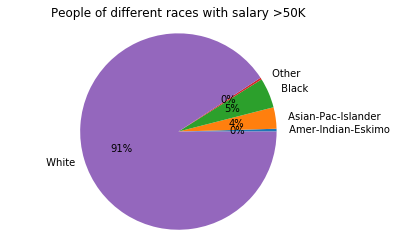

In [6]:
plt.pie([groupedDf['count'][i] for i in range(5,10)], labels=[groupedDf['race'][i] for i in range(5,10)], autopct='%0.0f%%', shadow=False)
plt.axis('equal')
plt.title('People of different races with salary >50K')
plt.show()

   salary-range     relationship  count
0         <=50K          Husband   7275
1         <=50K    Not-in-family   7449
2         <=50K   Other-relative    944
3         <=50K        Own-child   5001
4         <=50K        Unmarried   3228
5         <=50K             Wife    823
6          >50K          Husband   5918
7          >50K    Not-in-family    856
8          >50K   Other-relative     37
9          >50K        Own-child     67
10         >50K        Unmarried    218
11         >50K             Wife    745


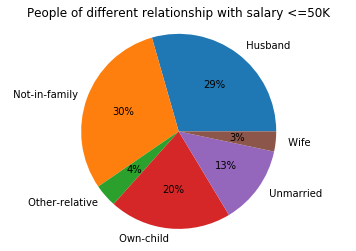

In [7]:
groupedDf = pd.DataFrame({'count' : df.groupby(['salary-range', 'relationship']).size()}).reset_index()
print(groupedDf)
plt.pie([groupedDf['count'][i] for i in range(6)], labels=[groupedDf['relationship'][i] for i in range(6)], autopct='%0.0f%%', shadow=False)
plt.axis('equal')
plt.title('People of different relationship with salary <=50K')
plt.show()

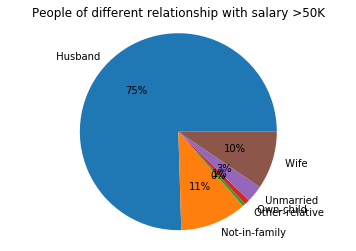

In [8]:
plt.pie([groupedDf['count'][i] for i in range(6, 12)], labels=[groupedDf['relationship'][i] for i in range(6, 12)], autopct='%0.0f%%', shadow=False)
plt.axis('equal')
plt.title('People of different relationship with salary >50K')
plt.show()

   salary-range          occupation  count
0         <=50K                   ?   1652
1         <=50K        Adm-clerical   3263
2         <=50K        Armed-Forces      8
3         <=50K        Craft-repair   3170
4         <=50K     Exec-managerial   2098
5         <=50K     Farming-fishing    879
6         <=50K   Handlers-cleaners   1284
7         <=50K   Machine-op-inspct   1752
8         <=50K       Other-service   3158
9         <=50K     Priv-house-serv    148
10        <=50K      Prof-specialty   2281
11        <=50K     Protective-serv    438
12        <=50K               Sales   2667
13        <=50K        Tech-support    645
14        <=50K    Transport-moving   1277
15         >50K                   ?    191
16         >50K        Adm-clerical    507
17         >50K        Armed-Forces      1
18         >50K        Craft-repair    929
19         >50K     Exec-managerial   1968
20         >50K     Farming-fishing    115
21         >50K   Handlers-cleaners     86
22         

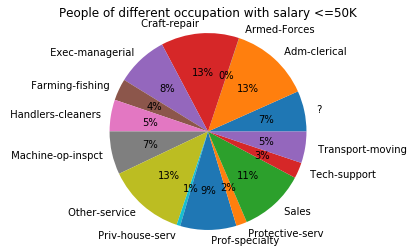

In [9]:
groupedDf = pd.DataFrame({'count' : df.groupby(['salary-range', 'occupation']).size()}).reset_index()
print(groupedDf)
plt.pie([groupedDf['count'][i] for i in range(15)], labels=[groupedDf['occupation'][i] for i in range(15)], autopct='%0.0f%%', shadow=False)
plt.axis('equal')
plt.title('People of different occupation with salary <=50K')
plt.show()

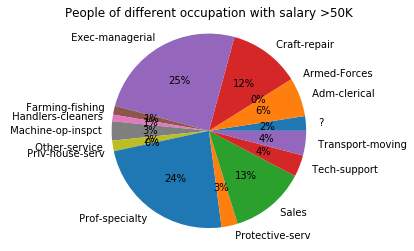

In [10]:
plt.pie([groupedDf['count'][i] for i in range(15, 30)], labels=[groupedDf['occupation'][i] for i in range(15, 30)], autopct='%0.0f%%', shadow=False)
plt.axis('equal')
plt.title('People of different occupation with salary >50K')
plt.show()

   salary-range          marital-status  count
0         <=50K                Divorced   3980
1         <=50K       Married-AF-spouse     13
2         <=50K      Married-civ-spouse   8284
3         <=50K   Married-spouse-absent    384
4         <=50K           Never-married  10192
5         <=50K               Separated    959
6         <=50K                 Widowed    908
7          >50K                Divorced    463
8          >50K       Married-AF-spouse     10
9          >50K      Married-civ-spouse   6692
10         >50K   Married-spouse-absent     34
11         >50K           Never-married    491
12         >50K               Separated     66
13         >50K                 Widowed     85


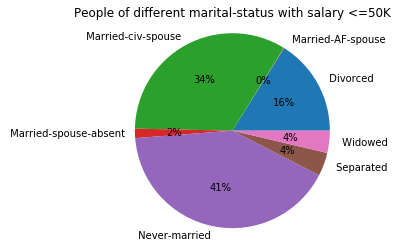

In [11]:
groupedDf = pd.DataFrame({'count' : df.groupby(['salary-range', 'marital-status']).size()}).reset_index()
print(groupedDf)
plt.pie([groupedDf['count'][i] for i in range(7)], labels=[groupedDf['marital-status'][i] for i in range(7)], autopct='%0.0f%%', shadow=False)
plt.axis('equal')
plt.title('People of different marital-status with salary <=50K')
plt.show()

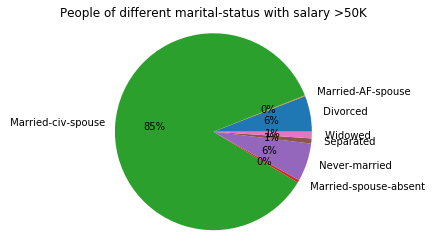

In [12]:
plt.pie([groupedDf['count'][i] for i in range(7, 14)], labels=[groupedDf['marital-status'][i] for i in range(7, 14)], autopct='%0.0f%%', shadow=False)
plt.axis('equal')
plt.title('People of different marital-status with salary >50K')
plt.show()